In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

##K-Means Clustering

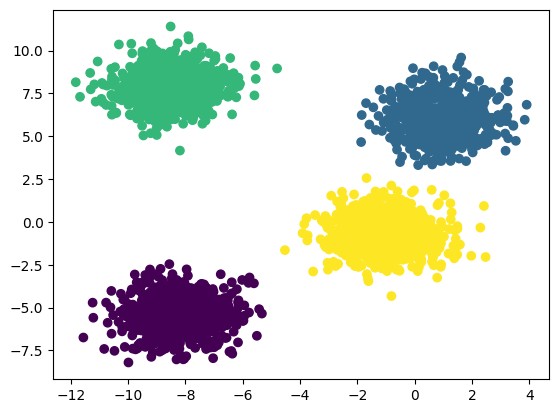

In [ ]:
X,y = make_blobs(n_samples =3000, n_features = 5,centers = 4, cluster_std = 1, random_state = 57)
# df = pd.read_csv("/content/penguins.csv")
# le = LabelEncoder()
# df.dropna(inplace = True)
# df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

# X = np.array(df.iloc[:,:4])
# y = np.array(df.iloc[:,-1])
# y = np.where(y == 1,0,1)

plt.scatter(X[:,0], X[:,1], c = y)

In [ ]:
class Kmeans:
  def __init__(self,epoch = 1000,n_clusters = None):
    self.epoch = epoch
    self.n_clusters = n_clusters
    self.centroids = None

  def fit(self,X_train):
    self.centroids = X_train[random.sample(range(0,X_train.shape[0]), self.n_clusters)]
    print(self.centroids)

    for i in range(self.epoch):
      # calculate distances
      cluster_group = self.cluster_def(X)
      old_centroids = self.centroids
      # calculate new centroids
      self.centroids = self.new_centroids(cluster_group, X)
      # end condition
      if(self.centroids == old_centroids).all():
        print("Finished before completing training cycles")
        break

    clusters = self.cluster_def(X)
    return clusters

  def cluster_def(self, X):
    cluster_group = []

    for row in X:
      distances = np.array([])
      for centroid in self.centroids:
        diff = np.abs(centroid - row)
        distances = np.append(distances,np.sqrt(np.dot( diff , diff )))
      cluster_group.append(np.argmin(distances))

    return np.array(cluster_group)

  def new_centroids(self, cluster_group, X):
    clusters = np.unique(cluster_group)
    new_centroids = []

    for cluster in clusters:
      new_centroids.append(np.mean(X[cluster_group == cluster], axis = 0))

    print(new_centroids)
    return np.array(new_centroids)





[[  0.34294876   3.59047655   8.12751676  -0.11193773  -1.76111816]
 [ -7.75833392   6.94292214  -2.94250881   2.74617488  -7.04235409]
 [-11.21390571  -5.58947097  -2.99876566  -4.55043844   2.27550684]
 [ -7.91395507  -3.13621288  -1.62242385  -4.10784979   0.68217393]]
[array([ 0.97053554,  6.09878311,  8.32637579,  0.45160465, -1.53396082]), array([-4.77359453,  3.63154287, -4.78011893,  5.09106931, -6.2307156 ]), array([-9.13321573, -6.10551096, -2.1328666 , -3.90280442,  1.81275954]), array([-7.9027093 , -5.1609605 , -1.65877632, -3.73599283,  1.19706656])]
[array([ 0.97053554,  6.09878311,  8.32637579,  0.45160465, -1.53396082]), array([-4.77359453,  3.63154287, -4.78011893,  5.09106931, -6.2307156 ]), array([-9.00190962, -6.04473151, -2.052486  , -3.86212608,  1.78022293]), array([-7.82959768, -5.08323076, -1.64669614, -3.73843666,  1.14257504])]
[array([ 0.97053554,  6.09878311,  8.32637579,  0.45160465, -1.53396082]), array([-4.77359453,  3.63154287, -4.78011893,  5.09106931,

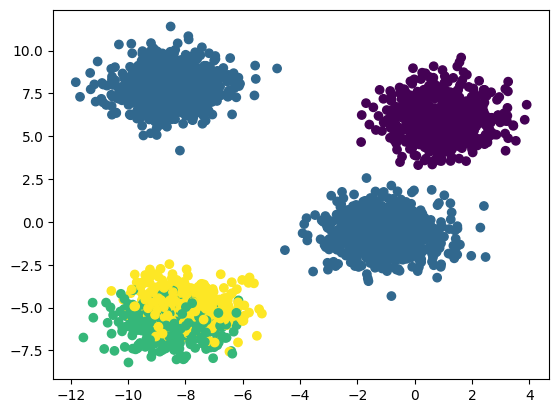

In [ ]:
km = Kmeans(epoch = 1000, n_clusters = 4)
groups = km.fit(X)

print(groups, y)
plt.scatter(X[:,0], X[:,1], c = groups)

##KNN

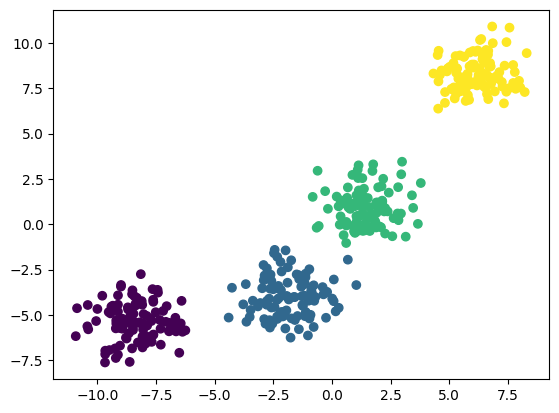

In [ ]:
X,y = make_blobs(n_samples =400, n_features = 2,centers = 4, cluster_std = 1, random_state = 57)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
plt.scatter(X[:,0], X[:,1], c = y)

In [ ]:
class Distance:
  def __init__(self):
    pass
  def calculate(self,x1, x2):
    pass

class Euclidean(Distance):
  def __init__(self):
    pass
  def calculate(self,x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class Manhattan(Distance):
  def __init__(self):
    pass
  def calculate(self,x1, x2):
    return np.sum(np.abs(x1 - x2))

class Minkowski(Distance):
  def __init__(self, p = 2):
    self.p = p
  def calculate(self,x1, x2):
    return np.sum(np.abs(x1 - x2)**self.p)**(1/self.p)



class KNN:
  def __init__(self, k = 5, distance = 'euclidean'):
    self.k = k
    if(distance == 'euclidean'):
      self.distance = Euclidean()
    elif(distance == 'manhattan'):
      self.distance = Manhattan()
    elif(distance == 'minkowski'):
      self.distance = Minkowski()
    else :
      self.distance = Euclidean()
    self.X_train = None
    self.y_train = None

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self,X_test):
    y_pred = np.ones(X_test.shape[0])
    for id,x in enumerate(X_test):
      distances = []
      for x_train in self.X_train:
        distances.append(self.distance.calculate(x, x_train))
      distances = np.array(distances)
      indices = np.argsort(distances)[:self.k]
      y_pred[id] = np.mean(self.y_train[indices])

    return y_pred

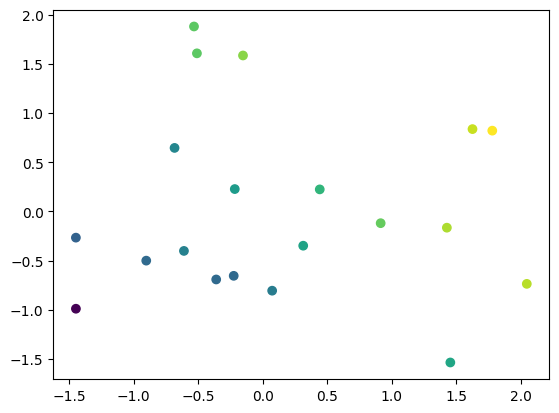

In [ ]:
from sklearn.metrics import accuracy_score, r2_score
md = KNN(k = 5, distance = 'euclidean')
md.fit(X_train, y_train)
y_pred = md.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred)



In [ ]:
from sklearn.datasets import make_regression
import plotly.express as px
X,y = make_regression(n_samples = 100, n_features = 2, shuffle=True, noise = 20, random_state = 57)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
px.scatter_3d(x = X[:,0], y = X[:,1], z = y)

In [ ]:
md = KNN(k = 5, distance = 'manhattan')
md.fit(X_train, y_train)
y_pred = md.predict(X_test)
print(r2_score(y_test, y_pred))

0.8986125576815168
